In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import time
from scipy.stats import linregress

In [11]:
file_to_load = os.path.join("weather_data" , "cities.csv")

In [12]:
# create a dataframe 
city_data_df = pd.read_csv(file_to_load)
city_data_df

,City ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Bethel,US,2022-08-02 03:19:00,41.3712,-73.4140,70.11,94,0,0.00
1,1,Upernavik,GL,2022-08-02 03:19:00,72.7868,-56.1549,44.76,73,100,3.65
2,2,Draguignan,FR,2022-08-02 03:19:01,43.5333,6.4667,71.01,75,21,2.30
3,3,Kukushtan,RU,2022-08-02 03:19:01,57.6464,56.4952,60.42,72,35,5.73
4,4,Sola,VU,2022-08-02 03:19:02,-13.8833,167.5500,80.71,78,15,16.42
...,...,...,...,...,...,...,...,...,...,...
585,585,Jadu,LY,2022-08-02 03:35:01,31.9530,12.0261,71.62,50,1,3.33
586,586,Tahe,CN,2022-08-02 03:35:01,52.3333,124.7333,80.78,45,25,5.82
587,587,Torit,SS,2022-08-02 03:35:02,4.4133,32.5678,66.83,97,100,2.44
588,588,Jiuquan,CN,2022-08-02 03:35:02,39.7432,98.5174,65.25,74,100,9.95


In [13]:
# Extract relevant data information for our plots
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

In [14]:
today =  time.strftime("%x")
today

'08/05/22'

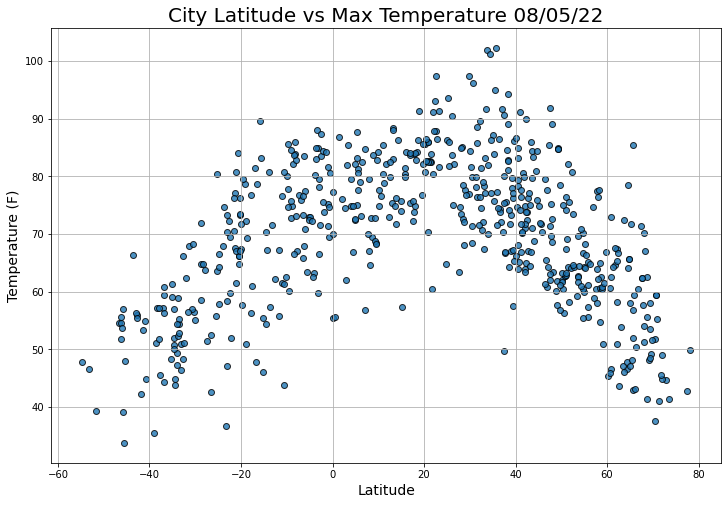

In [15]:
# plot latitude vs Temperature

plt.subplots(figsize = (12,8))
plt.scatter(lats,max_temps, marker="o", edgecolor= "black" , linewidth=1, alpha= 0.8 )
plt.xlabel("Latitude", fontsize = 14)
plt.ylabel('Temperature (F)', fontsize = 14)
plt.title("City Latitude vs Max Temperature " + today, fontsize= 20)
plt.grid(True)
# save this figure as fig1
plt.savefig("plots/fig1.png")  # already done
plt.show()

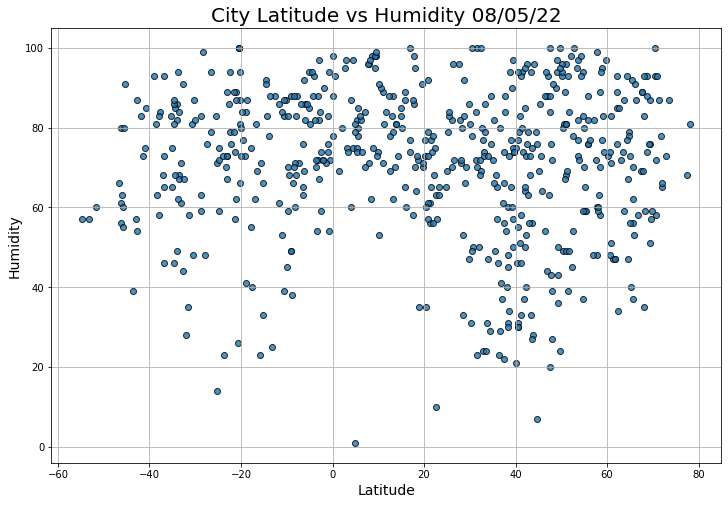

In [16]:
# plot latitude vs  Humidity
plt.subplots(figsize = (12,8))
plt.scatter(lats,humidity, marker="o", edgecolor= "black" , linewidth=1, alpha= 0.8 )
plt.xlabel("Latitude", fontsize = 14)
plt.ylabel('Humidity', fontsize = 14)
plt.title("City Latitude vs Humidity " + today, fontsize= 20)
plt.grid(True)
# save this figure as fig1
plt.savefig("plots/fig2.png") # already done
plt.show()

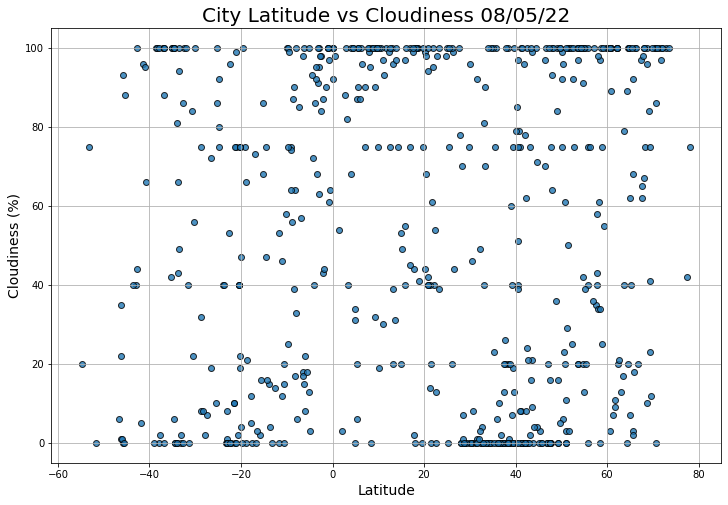

In [17]:
# plot latitude vs cloudiness
plt.subplots(figsize = (12,8))
plt.scatter(lats,cloudiness, marker="o", edgecolor= "black" , linewidth=1, alpha= 0.8 )
plt.xlabel("Latitude", fontsize = 14)
plt.ylabel('Cloudiness (%)', fontsize = 14)
plt.title("City Latitude vs Cloudiness " + today, fontsize= 20)
plt.grid(True)
# save this figure as fig1
plt.savefig("plots/fig3.png") # already done
plt.show()

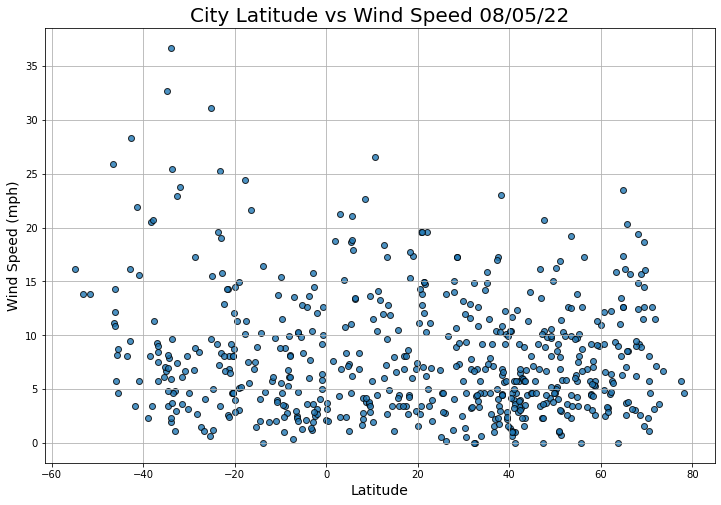

In [18]:
# plot latitude vs windspeed
plt.subplots(figsize = (12,8))
plt.scatter(lats,wind_speed, marker="o", edgecolor= "black" , linewidth=1, alpha= 0.8 )
plt.xlabel("Latitude", fontsize = 14)
plt.ylabel('Wind Speed (mph)', fontsize = 14)
plt.title("City Latitude vs Wind Speed " + today, fontsize= 20)
plt.grid(True)
# save this figure as fig1
plt.savefig("plots/fig4.png")  # already done
plt.show()

In [46]:
# create northern and southern hemispheres from the city_data_df
nh_citydata_df = city_data_df.loc[(city_data_df['Lat'] >= 0 )]
sh_citydata_df = city_data_df.loc[(city_data_df['Lat'] < 0 )]

nh_lats = nh_citydata_df['Lat']
nh_temp = nh_citydata_df['Max Temp']
nh_humidity = nh_citydata_df['Humidity']
nh_cloudiness = nh_citydata_df['Cloudiness']
nh_windspeed = nh_citydata_df['Wind Speed']

sh_lats = sh_citydata_df['Lat']
sh_temp = sh_citydata_df['Max Temp']
sh_humidity = sh_citydata_df['Humidity']
sh_cloudiness = sh_citydata_df['Cloudiness']
sh_windspeed = sh_citydata_df['Wind Speed']

In [21]:
linregress(lats, max_temps)

LinregressResult(slope=0.031887677381757296, intercept=68.8705959135141, rvalue=0.08248183719508692, pvalue=0.04521578715914074, stderr=0.015888889426860387, intercept_stderr=0.6144260396203948)

In [64]:
def linear_regression(x_values,y_values,title,y_label,text_coord):
    (slope,intercept,rvalue,pvalue,stderr) = linregress(x_values , y_values)
    
    # because y = mx + b
    line_eq = "y = " + str(round(slope,2))+"x + " + str(round(intercept , 2))
    regress_values = (x_values * slope + intercept) # remember y = mx + c
    
    # plot the scatter
    plt.subplots(figsize=(10,6))
    plt.scatter(x_values,y_values)
    
    # plot the line,  not sure what the 'r' is
    plt.plot(x_values , regress_values, 'r')
    plt.annotate(line_eq, text_coord, fontsize=15 , color="red")
    plt.xlabel('Latitude', fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    plt.title(title, fontsize=20)
    plt.show()

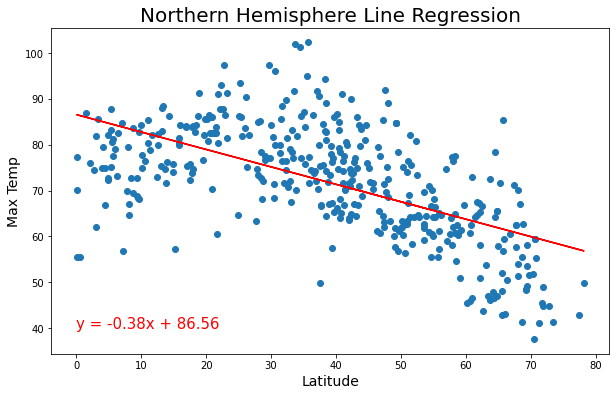

In [65]:
linear_regression(nh_lats,nh_temp, "Northern Hemisphere Line Regression" , "Max Temp" , (0,40))

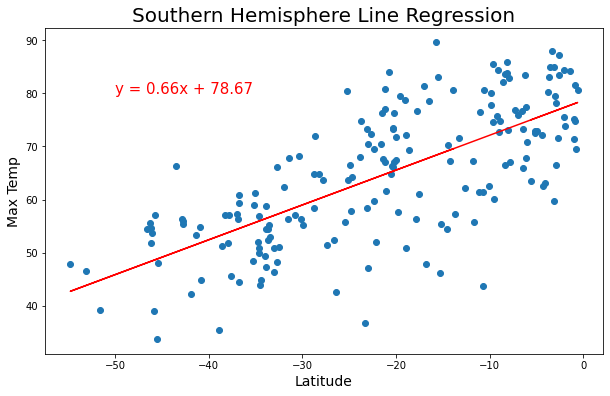

In [66]:
linear_regression(sh_lats,sh_temp, "Southern Hemisphere Line Regression" , "Max Temp" , (-50,80))

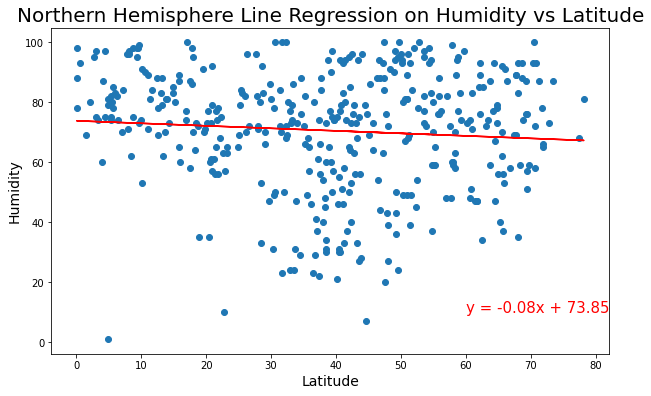

In [67]:
linear_regression(nh_lats,nh_humidity, "Northern Hemisphere Line Regression on Humidity vs Latitude", 'Humidity', (60,10))

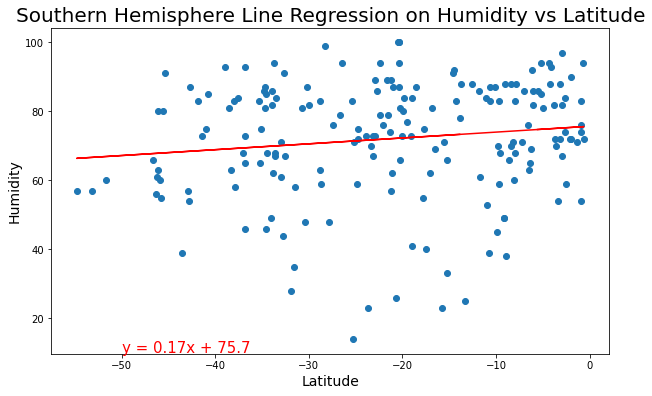

In [68]:
linear_regression(sh_lats,sh_humidity, "Southern Hemisphere Line Regression on Humidity vs Latitude", 'Humidity', (-50,10))

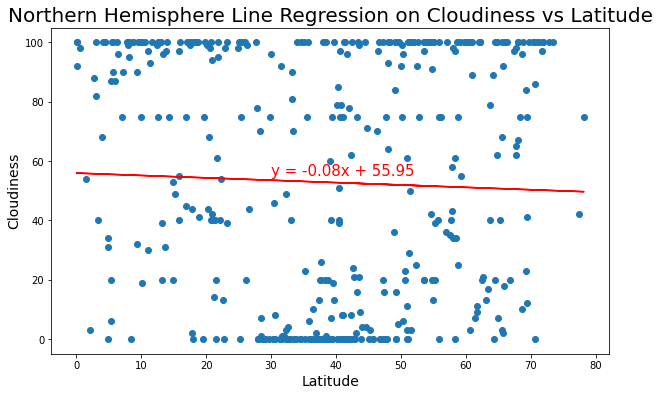

In [69]:
linear_regression(nh_lats,nh_cloudiness, "Northern Hemisphere Line Regression on Cloudiness vs Latitude", 'Cloudiness', (30,55))

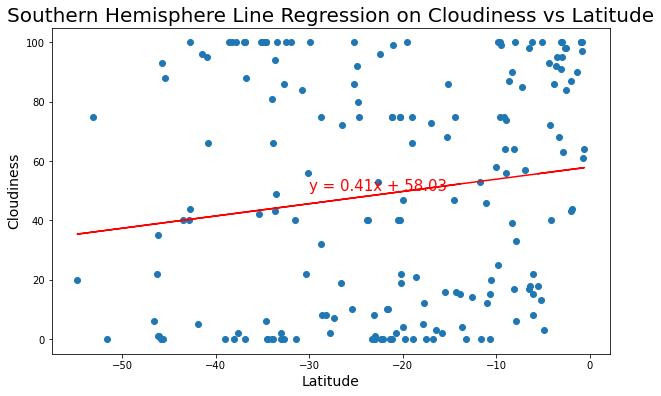

In [70]:
linear_regression(sh_lats,sh_cloudiness, "Southern Hemisphere Line Regression on Cloudiness vs Latitude", 'Cloudiness', (-30,50))

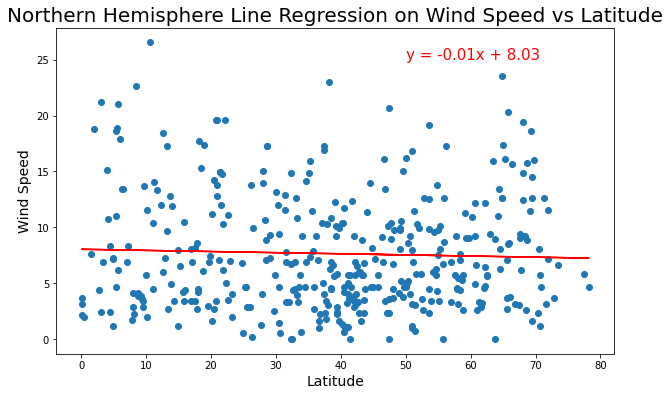

In [71]:
linear_regression(nh_lats,nh_windspeed, "Northern Hemisphere Line Regression on Wind Speed vs Latitude", 'Wind Speed', (50,25))

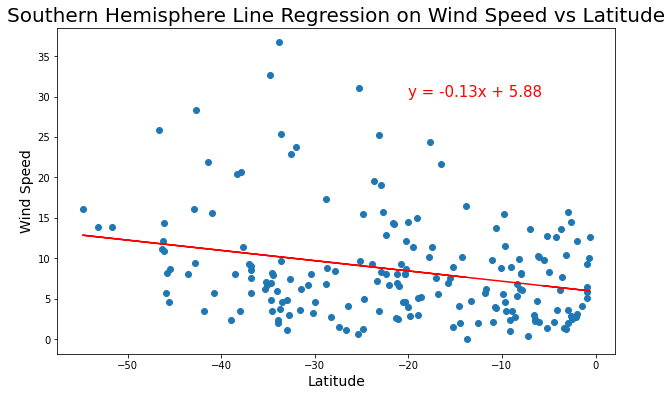

In [72]:
linear_regression(sh_lats,sh_windspeed, "Southern Hemisphere Line Regression on Wind Speed vs Latitude", 'Wind Speed', (-20,30))